In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import itertools
import community as community_louvain
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Generate graphs of 2-hop neighbourhood
def graph_gen(nodeid, G):
    
    num_hops = 2  
    nodes = []
    edges = []
    #Get small graph nodes
    nodes = nx.single_source_shortest_path_length(G, nodeid, cutoff=num_hops).keys() 
    graph = nx.ego_graph(G,nodeid, num_hops, center=True,undirected = True)
    #Get small graph edges
    edges = [e for e in graph.edges]
    plot_node_types(graph)
    print('nodeid',nodeid)
    print('node count',len(nodes))
    print('edge count',len(edges))
    return graph

In [4]:
def get_node_degree(G):
    #Adding node degree
    for node in G.nodes():
        d = G.degree(node)
        G.nodes[node]["degree"] = d
    return G

In [5]:
def plot_node_types(G):

    color_class_map = {0: 'blue', 1: 'red', 2: 'darkgreen', 3: 'orange'}

    nx.draw(G, 
        with_labels=False, node_color=[color_class_map[node[1]['class']] 
                        for node in G.nodes(data=True)], 
            node_size=200,
        font_color='white')
    plt.show()

In [6]:
def plot_partition(G,partition):
    # draw the graph
    pos = nx.spring_layout(G)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,label=True,
                            cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

In [7]:
def detect_community(G):
    partition = community_louvain.best_partition(G)
    plot_partition(G,partition)

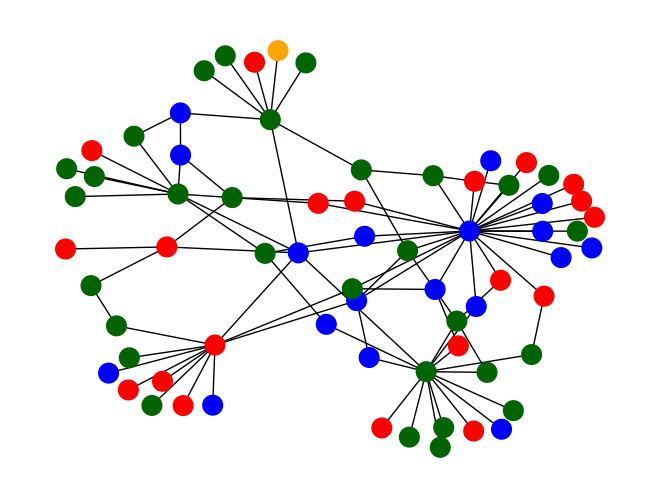

nodeid 0
node count 69
edge count 91


In [8]:
G_syn_dblp = nx.read_gexf("PubMed_hgen.gexf")
node_subset_syn = dict((n,d['degree']) for n,d in get_node_degree(G_syn_dblp).nodes().items() if d['degree']>=2)
node_id = list(node_subset_syn.keys())[0]
twohop = graph_gen(node_id, G_syn_dblp)

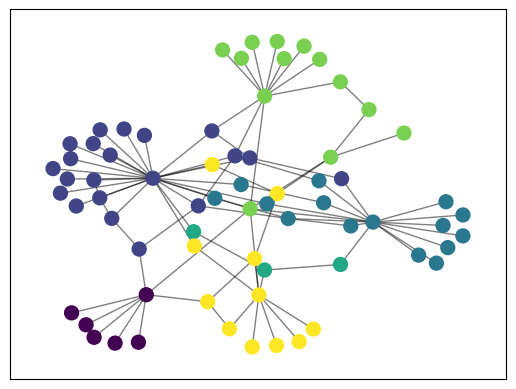

[{'884', '1134', '0', '1172', '783', '1303', '623', '951', '419', '194', '1260', '221', '882'}, {'1264', '1448', '314', '1345', '1362', '679', '299', '1446', '215', '640', '1221', '1506', '141', '291'}, {'1497', '1311', '989', '140', '1546', '1233', '590', '1230', '173', '1143'}, {'633', '209', '766', '69', '450', '1360', '1436', '1014', '311', '57', '1153', '237', '771', '688', '188', '600', '1384', '119'}, {'154', '1330', '1183', '1421', '364', '485', '943', '720', '956', '30', '975', '1059', '1316', '960'}]


In [9]:
detect_community(twohop)
list_com= nx.community.louvain_communities(twohop, seed=123)
print(list_com)

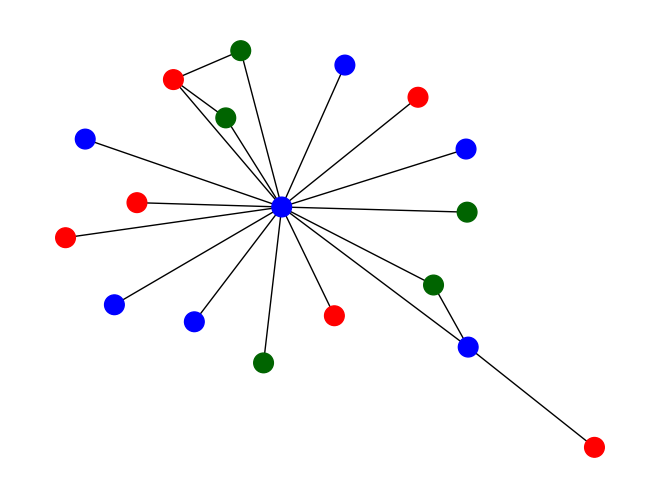

In [10]:
#Largest substructure
H = twohop.subgraph(max(list_com, key=len))
plot_node_types(H)

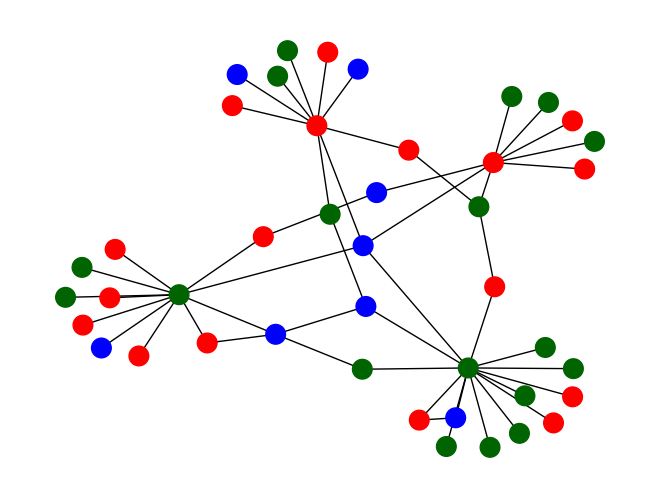

nodeid 2
node count 43
edge count 50


In [11]:
node_id = list(node_subset_syn.keys())[1]
twohop = graph_gen(node_id, G_syn_dblp)

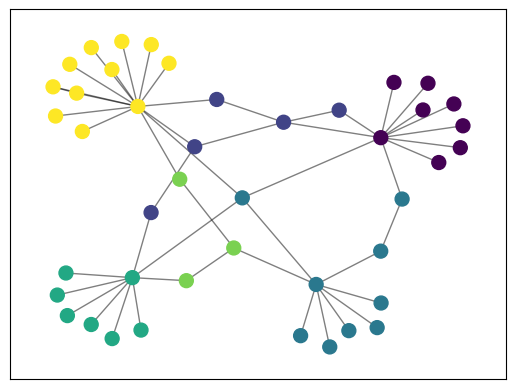

[{'1158', '565', '237', '631', '1217', '532', '1452', '531'}, {'684', '533', '2', '1519', '541', '284', '1335', '756', '1263'}, {'750', '482', '1471', '1107', '25', '57', '890'}, {'1267', '1311', '1461', '666', '487', '1115', '104', '1120', '587', '1344', '1143'}, {'905', '1106', '714'}, {'1137', '139', '348', '1239', '109'}]


In [12]:
detect_community(twohop)
list_com= nx.community.louvain_communities(twohop, seed=123)
print(list_com)

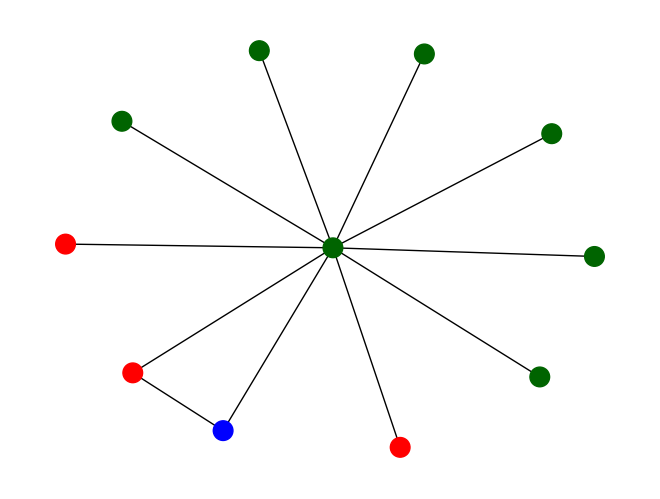

In [13]:
H = twohop.subgraph(max(list_com, key=len))
plot_node_types(H)

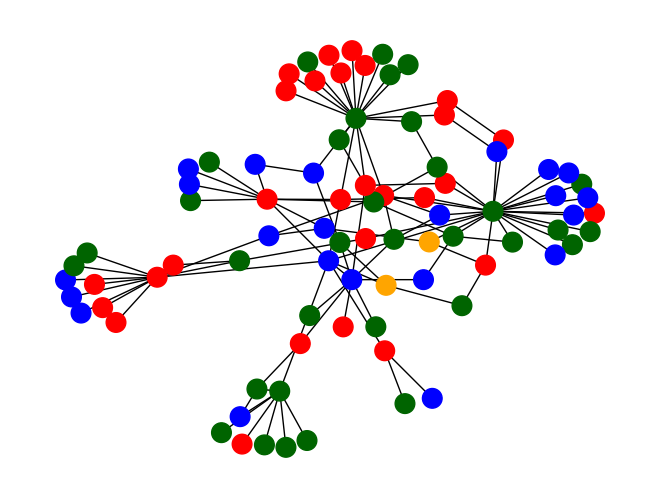

nodeid 3
node count 85
edge count 112


In [14]:
node_id = list(node_subset_syn.keys())[2]
twohop = graph_gen(node_id, G_syn_dblp)

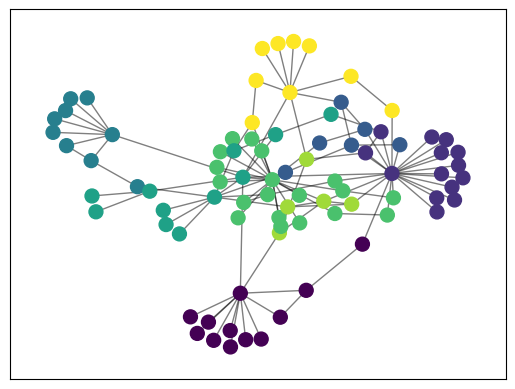

[{'665', '1421', '512', '582', '1387', '238', '67', '615', '998', '394', '259', '641'}, {'395', '338', '1030', '1176', '475', '90', '127', '24', '44'}, {'1204', '60', '972', '1309', '1426', '1232'}, {'721', '903', '530', '532', '507', '1166', '158', '662', '375', '830', '673', '1462', '1236', '325', '769', '840', '1389', '1263', '979'}, {'1436', '180', '107', '688', '209'}, {'160', '39', '1294', '82', '16', '343', '1537', '176', '72', '1116', '1109', '1318', '747', '1153'}, {'597', '1021', '848', '1207', '1080', '1239', '1288', '173', '1430'}, {'3', '437', '531', '1538', '1228', '1161', '1259', '1244', '167', '123', '1467'}]


In [15]:
detect_community(twohop)
list_com= nx.community.louvain_communities(twohop, seed=123)
print(list_com)

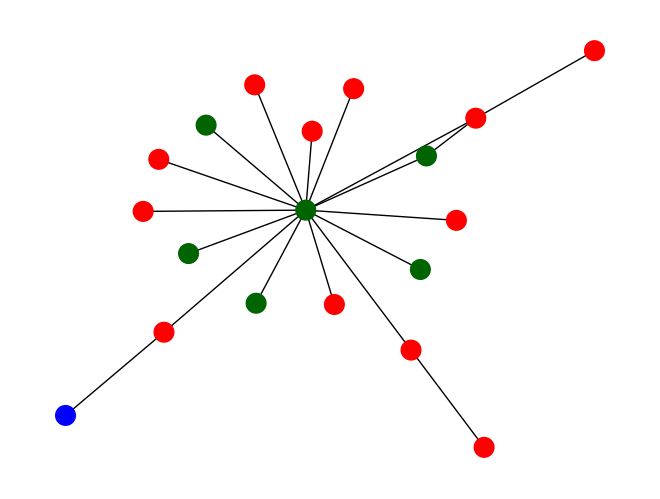

In [16]:
H = twohop.subgraph(max(list_com, key=len))
plot_node_types(H)

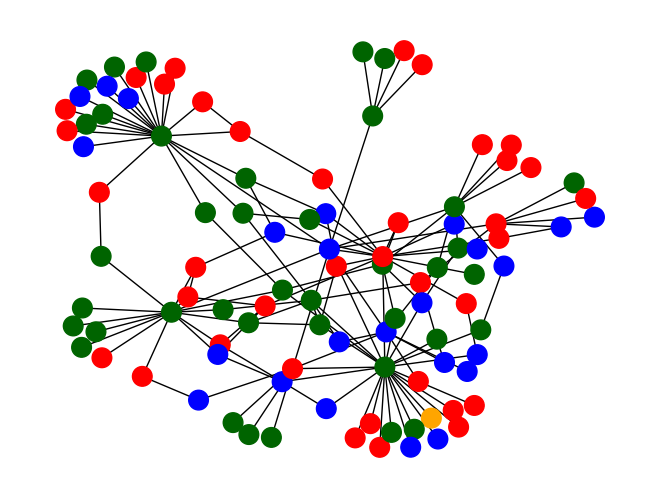

nodeid 4
node count 101
edge count 142


In [17]:
node_id = list(node_subset_syn.keys())[3]
twohop = graph_gen(node_id, G_syn_dblp)

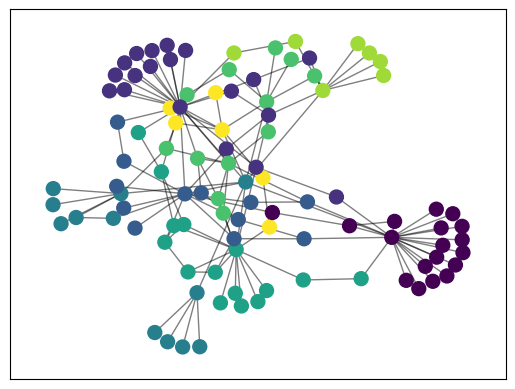

[{'1184', '247', '914', '1352', '628', '1395'}, {'908', '263', '1497', '661', '1541', '412', '971', '915', '1266', '230', '499', '362'}, {'807', '939', '1042', '284', '1259', '425', '518', '1482', '222', '167', '765', '1331', '1147', '737', '862', '656', '174', '1122'}, {'834', '536', '211', '4', '39', '1021', '1062', '355', '1080', '317', '1333', '641'}, {'996', '227', '309', '1418', '1330', '104', '163', '824', '305', '387', '599', '1454'}, {'421', '533', '989', '771', '140', '209', '1293', '805', '1115', '944', '491', '1213', '1244', '30', '1201'}, {'1494', '307', '586', '1183', '1210', '1471', '121', '874', '166', '1265', '1507', '257'}, {'1257', '1478', '550', '1480', '686', '697', '689', '1085', '1372', '256', '1405', '1143', '155', '647'}]


In [18]:
detect_community(twohop)
list_com= nx.community.louvain_communities(twohop, seed=123)
print(list_com)

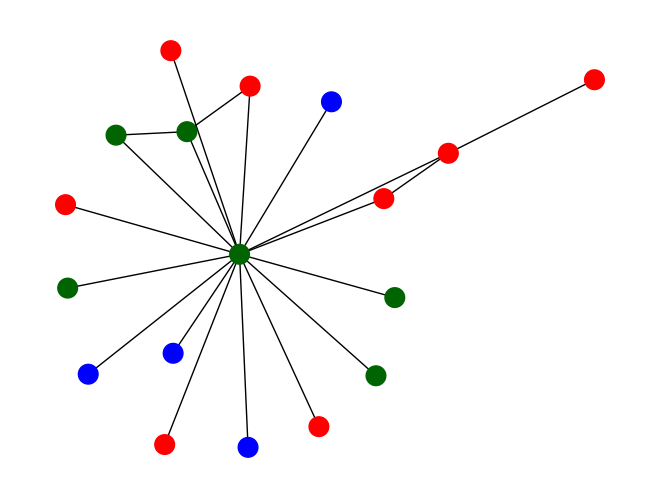

In [21]:
H = twohop.subgraph(max(list_com, key=len))
plot_node_types(H)